#BLOG POST 1: Data Retrieval and Cleaning

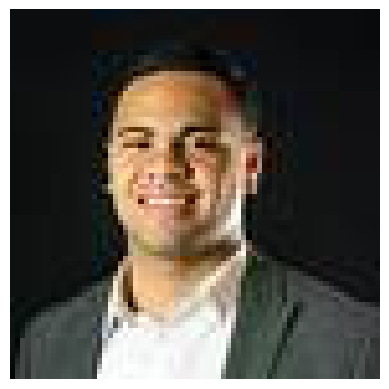

In [3]:
## IMAGE TEST
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "YOUR_IMAGE_URL_HERE"
response = requests.get("https://avatars.slack-edge.com/2022-08-02/3887372396916_c37e1c61f0bd65b13aae_72.jpg")

# Check if the request was successful
if response.status_code == 200:
    # Open the image
    image = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")

In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\bwegr\Desktop\MBA\Courses\STAT 386 - Data Science Process\Final Project\stat386project


In [3]:
# IMPORT DATA

# Import JSON and Create Tables
## Tables
    ### Users
    ### Channels

## Master file with all channels


import os

def get_folders_in_dir(dir):
    folders = []
    for item in os.listdir(dir):
        # Create full path
        full_path = os.path.join(dir, item)
        # Check if it's a directory
        if os.path.isdir(full_path):
            folders.append(full_path)
    return folders

# Example usage
folders = get_folders_in_dir('slack_data/')
print(folders)

['slack_data/2023-internships-rescue-brigade', 'slack_data/2024-cruise', 'slack_data/2024marketers', 'slack_data/2024_southamerica', 'slack_data/2025marketers', 'slack_data/acquisition-info-session-and-competition', 'slack_data/adam-smith-society', 'slack_data/advancedbrandfall23', 'slack_data/anime', 'slack_data/asia_2023_reunion', 'slack_data/b2b_fall_2023', 'slack_data/billion-dollar-contract', 'slack_data/blue_lounge', 'slack_data/byu_game_squad', 'slack_data/case_competitions', 'slack_data/chat', 'slack_data/christine', 'slack_data/christmas-choir-2023', 'slack_data/class-bidding-black-market', 'slack_data/club-blue-forge', 'slack_data/club_analytics', 'slack_data/club_gea', 'slack_data/club_gfa', 'slack_data/club_hla', 'slack_data/club_mbama', 'slack_data/club_mbats', 'slack_data/club_pma', 'slack_data/corporatefinancialreporting-mba501', 'slack_data/course-catalog', 'slack_data/fantasyfootball', 'slack_data/FC_F063PH5B2MA_Type something', 'slack_data/fine_arts', 'slack_data/hay-

In [21]:
import json
import pandas as pd

def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)
                with open(file_path, 'r') as json_file:
                    data = pd.DataFrame(json.load(json_file))
                    data.insert(0, 'channel', file)
                    all_data.append(data, ignore_index=True)
    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
all = read_json_files(folders)
#data = pd.DataFrame(all)
#data
all

C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_2796\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Tem

""


In [22]:
print(all)

Empty DataFrame
Columns: []
Index: []


In [ ]:
def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        if not os.path.exists(folder):
            print(f"Folder not found: {folder}")
            continue

        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)

                try:
                    with open(file_path, 'r') as json_file:
                        data = pd.read_json(json_file)
                        data.insert(0, 'date', file[0:10])
                        data.insert(0, 'channel', folder[11:])
                        all_data = all_data.append(data, ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
data = read_json_files(folders)
print(data)

In [30]:
data

,channel,date,client_msg_id,type,text,user,ts,blocks,team,user_team,...,date_delete,url_private_download,shares,inviter,last_read,x_files,root,username,app_id,hidden
0,2023-internships-rescue-brigade,2023-10-18,A3596BA8-FC44-4B86-8236-C9152409AE8F,message,"Hola muchachones , los créditos de cada semest...",U03M8T51VUY,1.697639e+09,"[{'type': 'rich_text', 'block_id': 'kdJP8', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-internships-rescue-brigade,2023-10-18,C141977D-A33B-4169-BC8C-22A78F89D3D3,message,Es lo que Christine me dijo. Podés preguntarle...,U03LK4ZPZ4J,1.697639e+09,"[{'type': 'rich_text', 'block_id': '8jBTM', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-internships-rescue-brigade,2023-10-18,5C0F4402-3BF3-42AE-A23F-99A34774D4C5,message,Buenísimo,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': 'dh4dY', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-internships-rescue-brigade,2023-10-18,FF5FB03E-48AD-427A-82AB-43DCFFD8E4C5,message,Gracias,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': '8VnI7', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-internships-rescue-brigade,2023-10-19,9BE97A04-A58D-45F8-97DB-D377984AE836,message,"Listo, ya confirme con Christine mis créditos ...",U03M8T51VUY,1.697728e+09,"[{'type': 'rich_text', 'block_id': 'X0wyY', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,y-hikers,2023-10-13,2480C1C8-1CE2-4455-B3DB-E72B07A78AB0,message,Thanks for the update!,U03LK4YF3A6,1.697244e+09,"[{'type': 'rich_text', 'block_id': 'VSUE8', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2744,y-hikers,2023-10-13,002216f5-e7a3-44af-933d-535d5b470c71,message,A primer on everyone's favorite oyster idiom...,U03LK39PKRR,1.697254e+09,"[{'type': 'rich_text', 'block_id': 'LIV48', 'e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2745,y-hikers,2023-10-13,EFCEABA8-CC03-456E-9353-DDCEAA0D020A,message,Wow. Phenomenal,U03LK4YBK7C,1.697259e+09,"[{'type': 'rich_text', 'block_id': 'oqmt0', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,y-hikers,2023-10-14,5f70e832-058a-425a-aac8-02124266f89c,message,I'm over here reacting to posts with lame yell...,U03LK39PKRR,1.697299e+09,"[{'type': 'rich_text', 'block_id': 'SNgyE', 'e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.describe()

,ts,thread_ts,reply_count,reply_users_count,latest_reply,is_locked,subscribed,upload,display_as_bot,created,size,date_delete,last_read,hidden
count,2.728000e+03,1.824000e+03,396.000000,396.000000,3.960000e+02,396.0,396.000000,256.0,231.0,2.000000e+01,20.000000,20.0,1.800000e+01,1.0
mean,1.697514e+09,1.697501e+09,3.573232,2.755051,1.697597e+09,0.0,0.045455,0.0,0.0,1.695944e+09,12.150000,0.0,1.697537e+09,1.0
std,7.483131e+05,8.236122e+05,3.691549,2.601480,7.647756e+05,0.0,0.208562,0.0,0.0,2.055917e+06,10.327658,0.0,7.548636e+05,NaN
min,1.696248e+09,1.690861e+09,1.000000,1.000000,1.696267e+09,0.0,0.000000,0.0,0.0,1.691348e+09,0.000000,0.0,1.696301e+09,1.0
25%,1.696917e+09,1.696958e+09,1.000000,1.000000,1.696981e+09,0.0,0.000000,0.0,0.0,1.694434e+09,0.000000,0.0,1.697001e+09,1.0
50%,1.697512e+09,1.697553e+09,2.000000,2.000000,1.697650e+09,0.0,0.000000,0.0,0.0,1.695764e+09,14.000000,0.0,1.697526e+09,1.0
75%,1.698162e+09,1.698117e+09,5.000000,3.000000,1.698200e+09,0.0,0.000000,0.0,0.0,1.697767e+09,14.750000,0.0,1.698110e+09,1.0
max,1.698815e+09,1.698813e+09,29.000000,19.000000,1.698873e+09,0.0,1.000000,0.0,0.0,1.698813e+09,31.000000,0.0,1.698690e+09,1.0


In [31]:
csv_file_path = 'all.csv'
data.to_csv(csv_file_path, index=False)

Visualization Ideas

Network graph with pictures that show connection across all channels
Channel Membership network graph

In [54]:
# Who Reacts Most? (Top Ten Reactors)
import re

react1 = pd.DataFrame(data[data['reactions'].notna()][['user','reactions']])

def num_and_sum(s):
    pattern = r"'count': (\d+)"
    counts = [int(num) for num in re.findall(pattern, s)]
    return sum(counts)

react1['sum_counts'] = react1['reactions'].astype(str).apply(num_and_sum)
react1

,user,reactions,sum_counts
11,U022KBV79MH,"[{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...",2
12,U03LK4ZPZ4J,"[{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...",2
19,U022KBV79MH,"[{'name': '+1', 'users': ['U03LMGXDFB6'], 'cou...",1
20,U03LMGXDFB6,"[{'name': '+1', 'users': ['U022KBV79MH'], 'cou...",1
21,U03LXQE14NM,"[{'name': 'point_up_2', 'users': ['U03LXQFQS3B...",2
...,...,...,...
2728,U03LN7V9M0U,"[{'name': 'heartpulse', 'users': ['U03P8MY0DR7...",2
2729,U03LK4YBK7C,"[{'name': 'hearts', 'users': ['U03M8T87HDE', '...",4
2740,U03LK4YF3A6,"[{'name': '+1', 'users': ['U05AMVCTLRZ'], 'cou...",1
2744,U03LK39PKRR,"[{'name': 'joy', 'users': ['U03LK4YF3A6', 'U05...",3


In [55]:
react1a = react1.groupby('user')['sum_counts'].sum().reset_index()
react1a

,user,sum_counts
0,U0171LYGQ2U,1
1,U022KBV79MH,4
2,U026AGC0FDY,1
3,U03AVEWPUQN,46
4,U03L4GLKLTZ,130
...,...,...
141,U05HK2SC7SM,1
142,U05HK2SEC8H,3
143,U05HW4UU20Y,3
144,U05MZL0DLVC,1


In [52]:
react1.dtypes

user          object
reactions     object
sum_counts     int64
dtype: object

In [63]:
test = pd.DataFrame({'name': 'joy', 'users': ['U03LK4YF3A6', 'U05B0NHD3LZ'], 'count': 2}, {'name': 'kirsipurejoy', 'users': ['U03LK4YBK7C'], 'count': 1})
test

ValueError: Length of values (2) does not match length of index (3)

In [69]:
import ast

# The input string
input_string = "[{'name': 'hearts', 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM', 'U03LG7DNSUV', 'U03PKR5GQUQ', 'U03P8MY0DR7', 'U05A7HF1DJB'], 'count': 6}, {'name': 'woman-golfing', 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM'], 'count': 2}, {'name': 'dancer', 'users': ['U03L4GUGBF1'], 'count': 1}]"

# Convert the string to a list of dictionaries
data = ast.literal_eval(input_string)

# Initialize an empty dictionary with desired keys
result = {'name': [], 'users': [], 'count': []}

# Iterate through each item and populate the result dictionary
for item in data:
    result['name'].extend([item['name']] * item['count'])
    result['users'].extend(item['users'])
    result['count'].extend([item['count']] * item['count'])

print(result)
df = pd.DataFrame(result)
df

{'name': ['hearts', 'hearts', 'hearts', 'hearts', 'hearts', 'hearts', 'woman-golfing', 'woman-golfing', 'dancer'], 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM', 'U03LG7DNSUV', 'U03PKR5GQUQ', 'U03P8MY0DR7', 'U05A7HF1DJB', 'U03L4GUGBF1', 'U03L4GP8ZMM', 'U03L4GUGBF1'], 'count': [6, 6, 6, 6, 6, 6, 2, 2, 1]}


,name,users,count
0,hearts,U03L4GUGBF1,6
1,hearts,U03L4GP8ZMM,6
2,hearts,U03LG7DNSUV,6
3,hearts,U03PKR5GQUQ,6
4,hearts,U03P8MY0DR7,6
5,hearts,U05A7HF1DJB,6
6,woman-golfing,U03L4GUGBF1,2
7,woman-golfing,U03L4GP8ZMM,2
8,dancer,U03L4GUGBF1,1


In [117]:
import ast
from pandas import json_normalize

def convert_string_to_dict(s):
    data = ast.literal_eval(s)
    result = {'name': [], 'users': [], 'count': []}
    
    for item in data:
        result['name'].extend([item['name']] * item['count'])
        result['users'].extend(item['users'])
        result['count'].extend([item['count']] * item['count'])
    
    return result

list_of_dic = react1['reactions'].astype(str).apply(convert_string_to_dict).tolist()

# Convert each dictionary to a DataFrame and store in a list
#dfs = [pd.DataFrame(d) for d in list_of_dic]

# Concatenate all DataFrames into one
react2 = pd.DataFrame({'name': [], 'users': [], 'count': []})
for i in list_of_dic:
    #print("dict:", i)
    max_length = max(len(lst) for lst in i.values())
    for key in i:
        i[key].extend([None] * (max_length - len(i[key])))
    #print("dict2:", i)
    df = pd.DataFrame(i)
    #print("df:", df)
    #print("final:", final)
    react2 = pd.concat([react2, df], ignore_index=True)

react2

# final_df = pd.concat(dfs, ignore_index=True)
# print(final_df)
# result2 = {'name': [], 'users': [], 'count': []}
    
# for item in final_df:
#     result['name'].extend([item['name']] * item['count'])
#     result['users'].extend(item['users'])
#     result['count'].extend([item['count']] * item['count'])


# print(result2)

,name,users,count
0,+1,U03M8T51VUY,1.0
1,sunglasses,U03M8T51VUY,1.0
2,+1,U03M8T51VUY,1.0
3,cool-doge,U03M8T51VUY,1.0
4,+1,U03LMGXDFB6,1.0
...,...,...,...
5462,+1,U05AMVCTLRZ,1.0
5463,joy,U03LK4YF3A6,2.0
5464,joy,U05B0NHD3LZ,2.0
5465,kirsipurejoy,U03LK4YBK7C,1.0


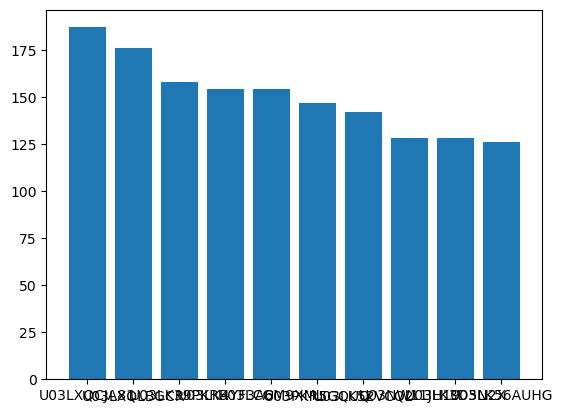

In [132]:
import matplotlib.pyplot as plt

react2a = react2[['users', 'count']].groupby('users').count().reset_index().sort_values(by='count', ascending=False)
react2a
plt.bar(react2a['users'][0:10],react2a['count'][0:10])
plt.show()

In [115]:
final

,name,users,count
0,+1,U03M8T51VUY,1.0
1,sunglasses,U03M8T51VUY,1.0
2,+1,U03M8T51VUY,1.0
3,cool-doge,U03M8T51VUY,1.0
4,+1,U03LMGXDFB6,1.0
...,...,...,...
5462,+1,U05AMVCTLRZ,1.0
5463,joy,U03LK4YF3A6,2.0
5464,joy,U05B0NHD3LZ,2.0
5465,kirsipurejoy,U03LK4YBK7C,1.0


In [103]:
print(i)

{'name': ['blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'blue_heart', 'the_horns::skin-tone-3', 'the_horns::skin-tone-3', 'the_horns::skin-tone-3', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns', 'the_horns',

In [109]:
print(len(i['name']))
print(len(i['users']))
print(len(i['count']))

118
113
118


In [110]:
print(i['users'])

['U05AN015NSX', 'U03LG7C5QAH', 'U05D98WS6FQ', 'U03LCGM9XML', 'U03LG7C9P8V', 'U05HK2S6TLZ', 'U05AMVD19GT', 'U03LK56EXJN', 'U03LK39PKRR', 'U03LK533VR8', 'U03NW11JH19', 'U03LK551XFU', 'U03LMGXDFB6', 'U05H6DGRMRQ', 'U03LG7BV35K', 'U05BBQG6MKJ', 'U05BBQFJ056', 'U03M8TCTA6L', 'U03LXQCJA81', 'U03LK5045V0', 'U03LXQE14NM', 'U05GZPFMAA2', 'U03PKR5GQUQ', 'U05BBQFD4V6', 'U03LK4YBK7C', 'U03LXQCEVKK', 'U03LXQLBGCR', 'U05AFDTJEUW', 'U03L4GLKLTZ', 'U05BBQDP59N', 'U03LXQFU5SM', 'U05AK5HTE77', 'U05A7HD4XE3', 'U03LK56AUHG', 'U05AFDSJH70', 'U03LK3D5N2X', 'U05AFDRFJ3Y', 'U03M8T51VUY', 'U05BBQG8FTJ', 'U05AN02C0E7', 'U03L57R4HN3', 'U03LXQBTQJV', 'U03LK4YJGQJ', 'U03LMGXA3FW', 'U03L4GP8ZMM', 'U03L4GT3B55', 'U03LXQH9QMP', 'U03M8T9K6SU', 'U05A7HE5MTR', 'U05A7HF1DJB', 'U03LCGM9XML', 'U03LK52VCQ2', 'U03L4GT3B55', 'U03LK56EXJN', 'U03NW11JH19', 'U03LK551XFU', 'U03LMGXDFB6', 'U03LG7BV35K', 'U05AMVCTLRZ', 'U03LXQE14NM', 'U05GZPFMAA2', 'U03LXQCEVKK', 'U03LXQLBGCR', 'U03LK56AUHG', 'U03LK3D5N2X', 'U05BBQG8FTJ', 'U03L57R4

In [92]:
#dfs[4]['name']
ts = pd.DataFrame(list_of_dicts[4])
ts

,name,users,count
0,point_up_2,U03LXQFQS3B,2
1,point_up_2,U03LXQE14NM,2


In [111]:
import pandas as pd

# Example dictionary with arrays of different lengths
data = {
    'col1': [1, 2, 3],
    'col2': [4, 5],
    'col3': [6]
}

# Find the maximum length of any array in the dictionary
max_length = max(len(lst) for lst in data.values())

# Pad shorter lists with None (which will become NaN in the DataFrame)
for key in data:
    data[key].extend([None] * (max_length - len(data[key])))

# Now create the DataFrame
df = pd.DataFrame(data)

print(df)

   col1  col2  col3
0     1   4.0   6.0
1     2   5.0   NaN
2     3   NaN   NaN


In [73]:
res = {'name': [], 'users': [], 'count': []}

for index, row in react1.iterrows():
    data = ast.literal_eval(row['reactions'])
    for i in data:    
        res['name'].extend([item['name']] * item['count'])
        res['users'].extend(item['users'])
        res['count'].extend([item['count']] * item['count'])
        

df2 = pd.DataFrame(res)
df2

ValueError: malformed node or string: [{'name': '+1', 'users': ['U03M8T51VUY'], 'count': 1}, {'name': 'sunglasses', 'users': ['U03M8T51VUY'], 'count': 1}]

In [59]:
for index, row in react1.iterrows():
    
    print(f"Index: {index}, Row: {row}")

# react2 = [pd.read_json(i) ]
# react2

Index: 11, Row: user                                                U022KBV79MH
reactions     [{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...
sum_counts                                                    2
Name: 11, dtype: object
Index: 12, Row: user                                                U03LK4ZPZ4J
reactions     [{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...
sum_counts                                                    2
Name: 12, dtype: object
Index: 19, Row: user                                                U022KBV79MH
reactions     [{'name': '+1', 'users': ['U03LMGXDFB6'], 'cou...
sum_counts                                                    1
Name: 19, dtype: object
Index: 20, Row: user                                                U03LMGXDFB6
reactions     [{'name': '+1', 'users': ['U022KBV79MH'], 'cou...
sum_counts                                                    1
Name: 20, dtype: object
Index: 21, Row: user                                                U03L

In [ ]:
# What are the most popular emojis? (Top Ten Reactions)



In [ ]:
# Who Replies Most? (Top Ten Repliers)



In [ ]:
# Who generates the most replies? (Top Ten Reply Generators)



In [ ]:
# Who generates the most reactions? (Top Ten Reaction Generators)



In [ ]:
# Who generates the fastest replies? (out of 10+?) have side by side with number of total replies (Top Ten)



In [ ]:
# What kind of networks exist among channels? PyVis



In [ ]:
# What kind of networks exist among replies? PyVis



In [ ]:
# What kind of networks exist among reactions?



In [ ]:
# Channel Membership (Top Ten People with Highest Public Channel Membership) - total and % membership

In [ ]:
# Channel Membership network graph



In [ ]:
# Who Uses Emojis Most in Their Messages?